# Import Libraries

In [212]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [4]:
dataset= pd.read_csv('health care diabetes.csv')

In [5]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
dataset.shape

(768, 9)

# Project Task: Week 1 -  Data Exploration and Missing Values Treatment

In [7]:
dataset.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

#### Since there is no null value.It means 0 represent as missing value, so let us find how many have missing value in pecentage.

In [8]:
(dataset['Glucose'][dataset['Glucose']==0].count()/768)*100

0.6510416666666667

#####  0.65 of data having missing value, so we can ignore it.

In [9]:
(dataset['BloodPressure'][dataset['BloodPressure']==0].count()/768)*100

4.557291666666666

In [10]:
(dataset['SkinThickness'][dataset['SkinThickness']==0].count()/768)*100

29.557291666666668

In [11]:
(dataset['Insulin'][dataset['Insulin']==0].count()/768)*100

48.69791666666667

In [12]:
(dataset['BMI'][dataset['BMI']==0].count()/768)*100

1.4322916666666665

#####  1.43 of data having missing value, so we can ignore it.

### The data of BloodPressure, SkinThickness and Insulin having high missing value, so lets try to fill up.

(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

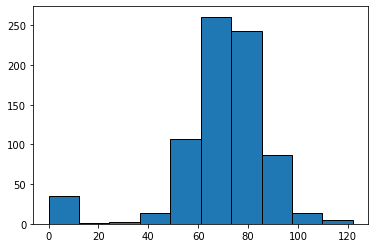

In [13]:
plt.hist(dataset['BloodPressure'],edgecolor='black')

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

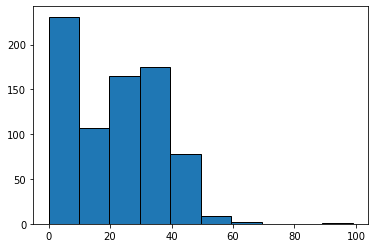

In [14]:
plt.hist(dataset['SkinThickness'],edgecolor='black')

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

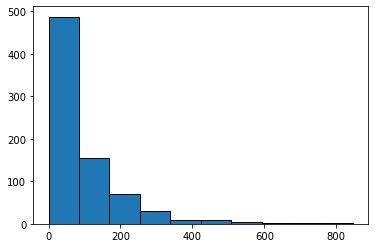

In [15]:
plt.hist(dataset['Insulin'],edgecolor='black')

In [16]:
dataset[dataset['BloodPressure']!=0]['BloodPressure'].describe()

count    733.000000
mean      72.405184
std       12.382158
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [17]:
dataset[dataset['SkinThickness']!=0]['SkinThickness'].describe()

count    541.000000
mean      29.153420
std       10.476982
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [18]:
dataset[dataset['Insulin']!=0]['Insulin'].describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

#### mean value of BloodPressure = 72.405184 ,mean value of SkinThickness = 29.153420, mean value of Insulin = 155.548223. Lets replace 0 with mean value.

In [19]:
from numpy import nan
dataset_imp = dataset.copy()
dataset_imp[['BloodPressure','SkinThickness','Insulin']]=dataset_imp[['BloodPressure','SkinThickness','Insulin']].replace(0,nan)

In [20]:
dataset_imp.fillna(dataset_imp.mean(), inplace=True)

(array([  3.,   2.,  35., 118., 261., 214., 105.,  18.,  10.,   2.]),
 array([ 24. ,  33.8,  43.6,  53.4,  63.2,  73. ,  82.8,  92.6, 102.4,
        112.2, 122. ]),
 <BarContainer object of 10 artists>)

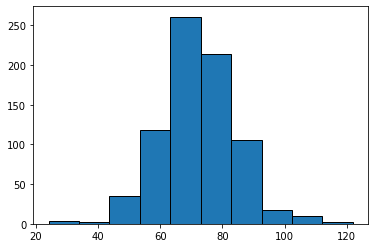

In [21]:
plt.hist(dataset_imp['BloodPressure'],edgecolor='black')

(array([ 59., 141., 408., 118.,  36.,   4.,   1.,   0.,   0.,   1.]),
 array([ 7. , 16.2, 25.4, 34.6, 43.8, 53. , 62.2, 71.4, 80.6, 89.8, 99. ]),
 <BarContainer object of 10 artists>)

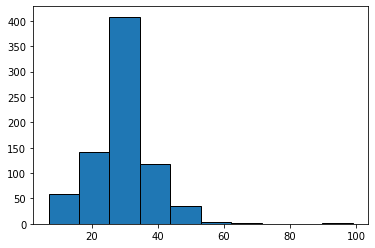

In [22]:
plt.hist(dataset_imp['SkinThickness'],edgecolor='black')

(array([142., 517.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <BarContainer object of 10 artists>)

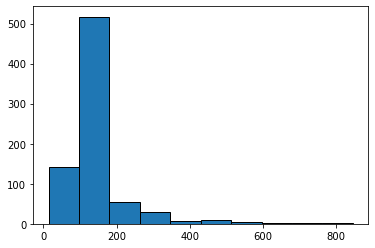

In [23]:
plt.hist(dataset_imp['Insulin'],edgecolor='black')

In [24]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
dataset_imp.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,72.405184,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,12.096346,8.790942,85.021108,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,121.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
dataset_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


<AxesSubplot:>

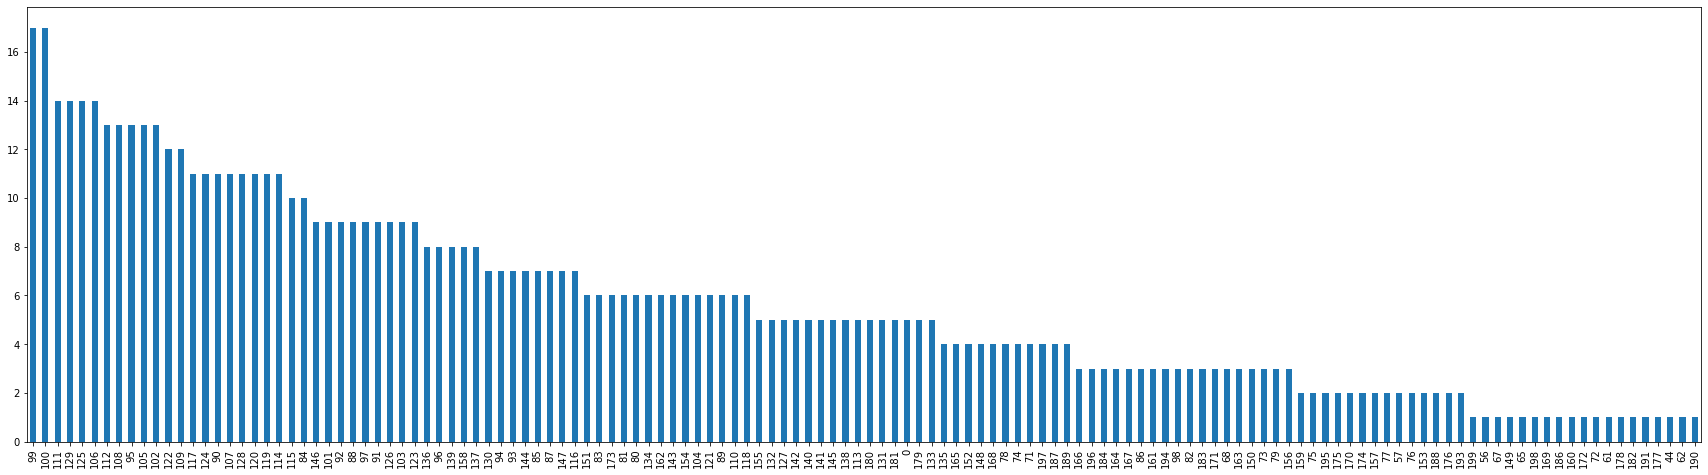

In [27]:
dataset_imp['Glucose'].value_counts().plot.bar(figsize=(30,8))

<AxesSubplot:>

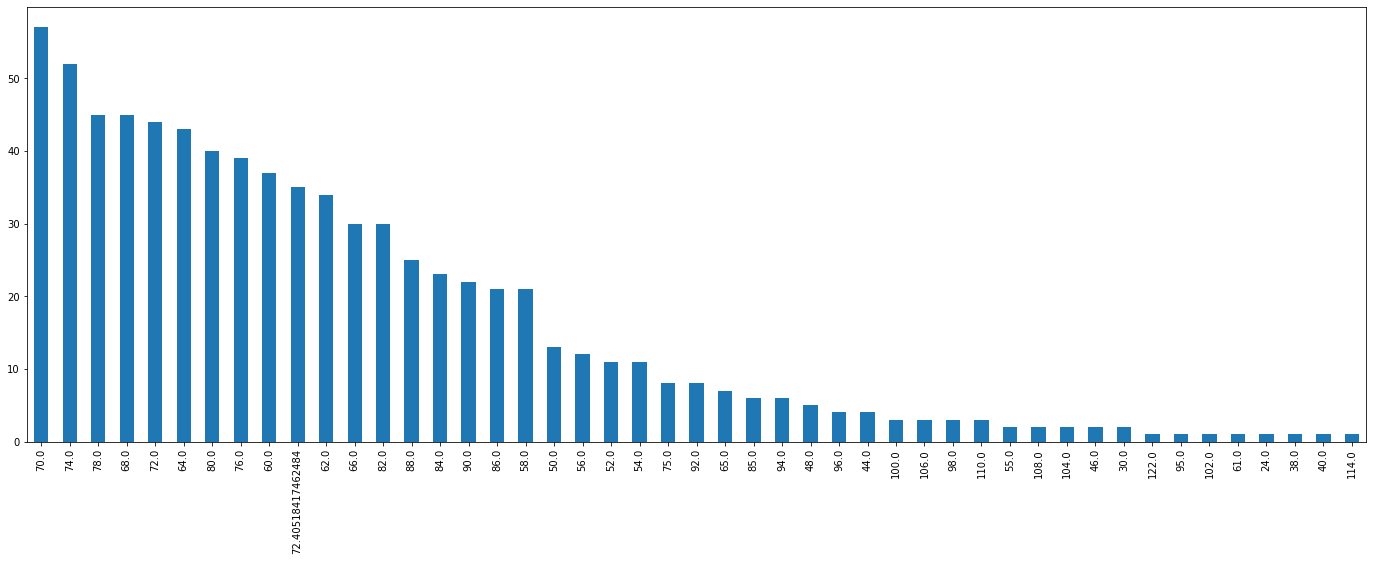

In [28]:
dataset_imp['BloodPressure'].value_counts().plot.bar(figsize=(24,8))

<AxesSubplot:>

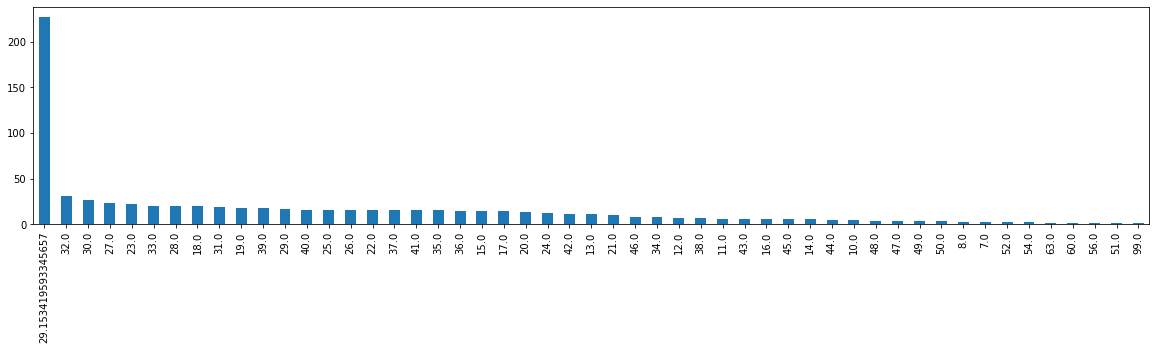

In [29]:
dataset_imp['SkinThickness'].value_counts().plot.bar(figsize=(20,4))

<AxesSubplot:>

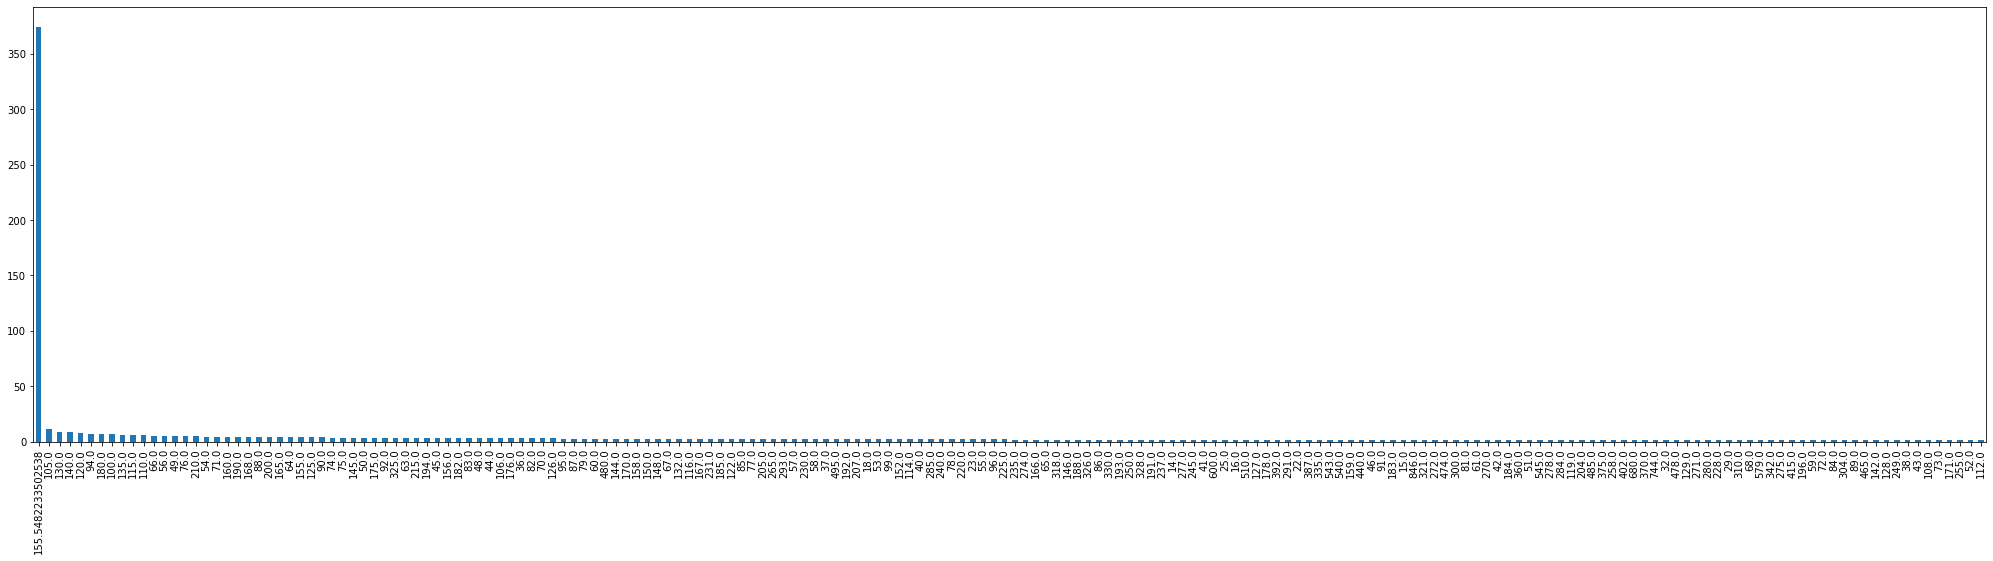

In [30]:
dataset_imp['Insulin'].value_counts().plot.bar(figsize=(35,8))

<AxesSubplot:>

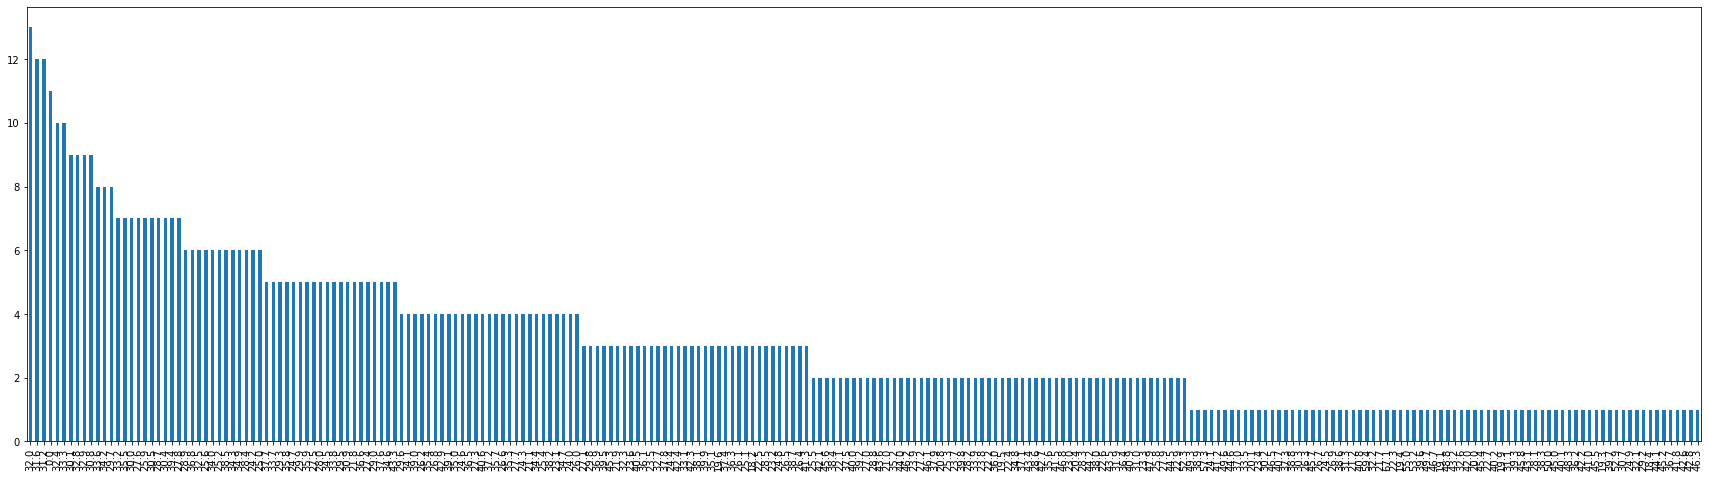

In [31]:
dataset_imp['BMI'].value_counts().plot.bar(figsize=(30,8))

# Project Task: Week 2 -  Data Exploration and Analysis, Plots.

In [32]:
Positive=dataset_imp[dataset_imp['Outcome']==1]

In [33]:
Positive.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.00000,155.548223,33.6,0.627,50,1
2,8,183,64.0,29.15342,155.548223,23.3,0.672,32,1
4,0,137,40.0,35.00000,168.000000,43.1,2.288,33,1
6,3,78,50.0,32.00000,88.000000,31.0,0.248,26,1
8,2,197,70.0,45.00000,543.000000,30.5,0.158,53,1


In [34]:
Negative=dataset_imp[dataset_imp['Outcome']==0]

In [35]:
Negative.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66.000000,29.00000,155.548223,26.6,0.351,31,0
3,1,89,66.000000,23.00000,94.000000,28.1,0.167,21,0
5,5,116,74.000000,29.15342,155.548223,25.6,0.201,30,0
7,10,115,72.405184,29.15342,155.548223,35.3,0.134,29,0
10,4,110,92.000000,29.15342,155.548223,37.6,0.191,30,0


(array([ 2.,  0.,  0.,  1., 13., 54., 63., 51., 45., 39.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 [<matplotlib.patches.Polygon at 0x20e9e575940>])

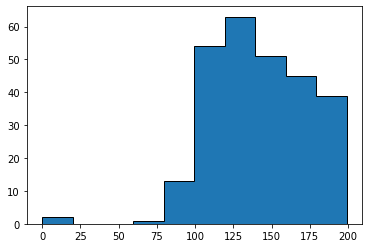

In [36]:
plt.hist(Positive['Glucose'],histtype='stepfilled',edgecolor='Black')

(array([ 1.,  1., 11., 20., 60., 98., 48., 18.,  6.,  5.]),
 array([ 30. ,  38.4,  46.8,  55.2,  63.6,  72. ,  80.4,  88.8,  97.2,
        105.6, 114. ]),
 [<matplotlib.patches.Polygon at 0x20e9e5edc40>])

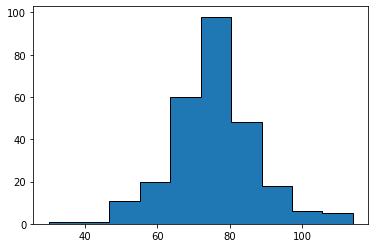

In [37]:
plt.hist(Positive['BloodPressure'],histtype='stepfilled',edgecolor='Black')

(array([  6.,  32., 154.,  54.,  19.,   1.,   1.,   0.,   0.,   1.]),
 array([ 7. , 16.2, 25.4, 34.6, 43.8, 53. , 62.2, 71.4, 80.6, 89.8, 99. ]),
 [<matplotlib.patches.Polygon at 0x20e9eab2df0>])

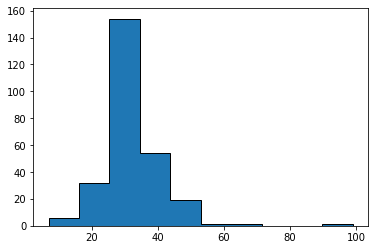

In [38]:
plt.hist(Positive['SkinThickness'],histtype='stepfilled',edgecolor='Black')

(array([ 16., 196.,  28.,  13.,   3.,   7.,   3.,   1.,   0.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 [<matplotlib.patches.Polygon at 0x20e9eb1a6d0>])

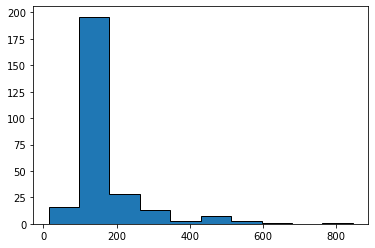

In [39]:
plt.hist(Positive['Insulin'],histtype='stepfilled',edgecolor='Black')

(array([ 2.,  0.,  0., 16., 99., 97., 41., 10.,  2.,  1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 [<matplotlib.patches.Polygon at 0x20e9eb7af70>])

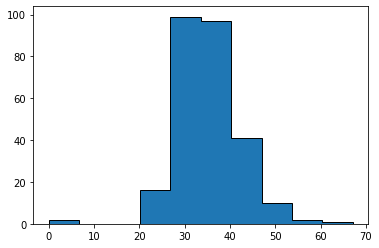

In [40]:
plt.hist(Positive['BMI'],histtype='stepfilled',edgecolor='Black')

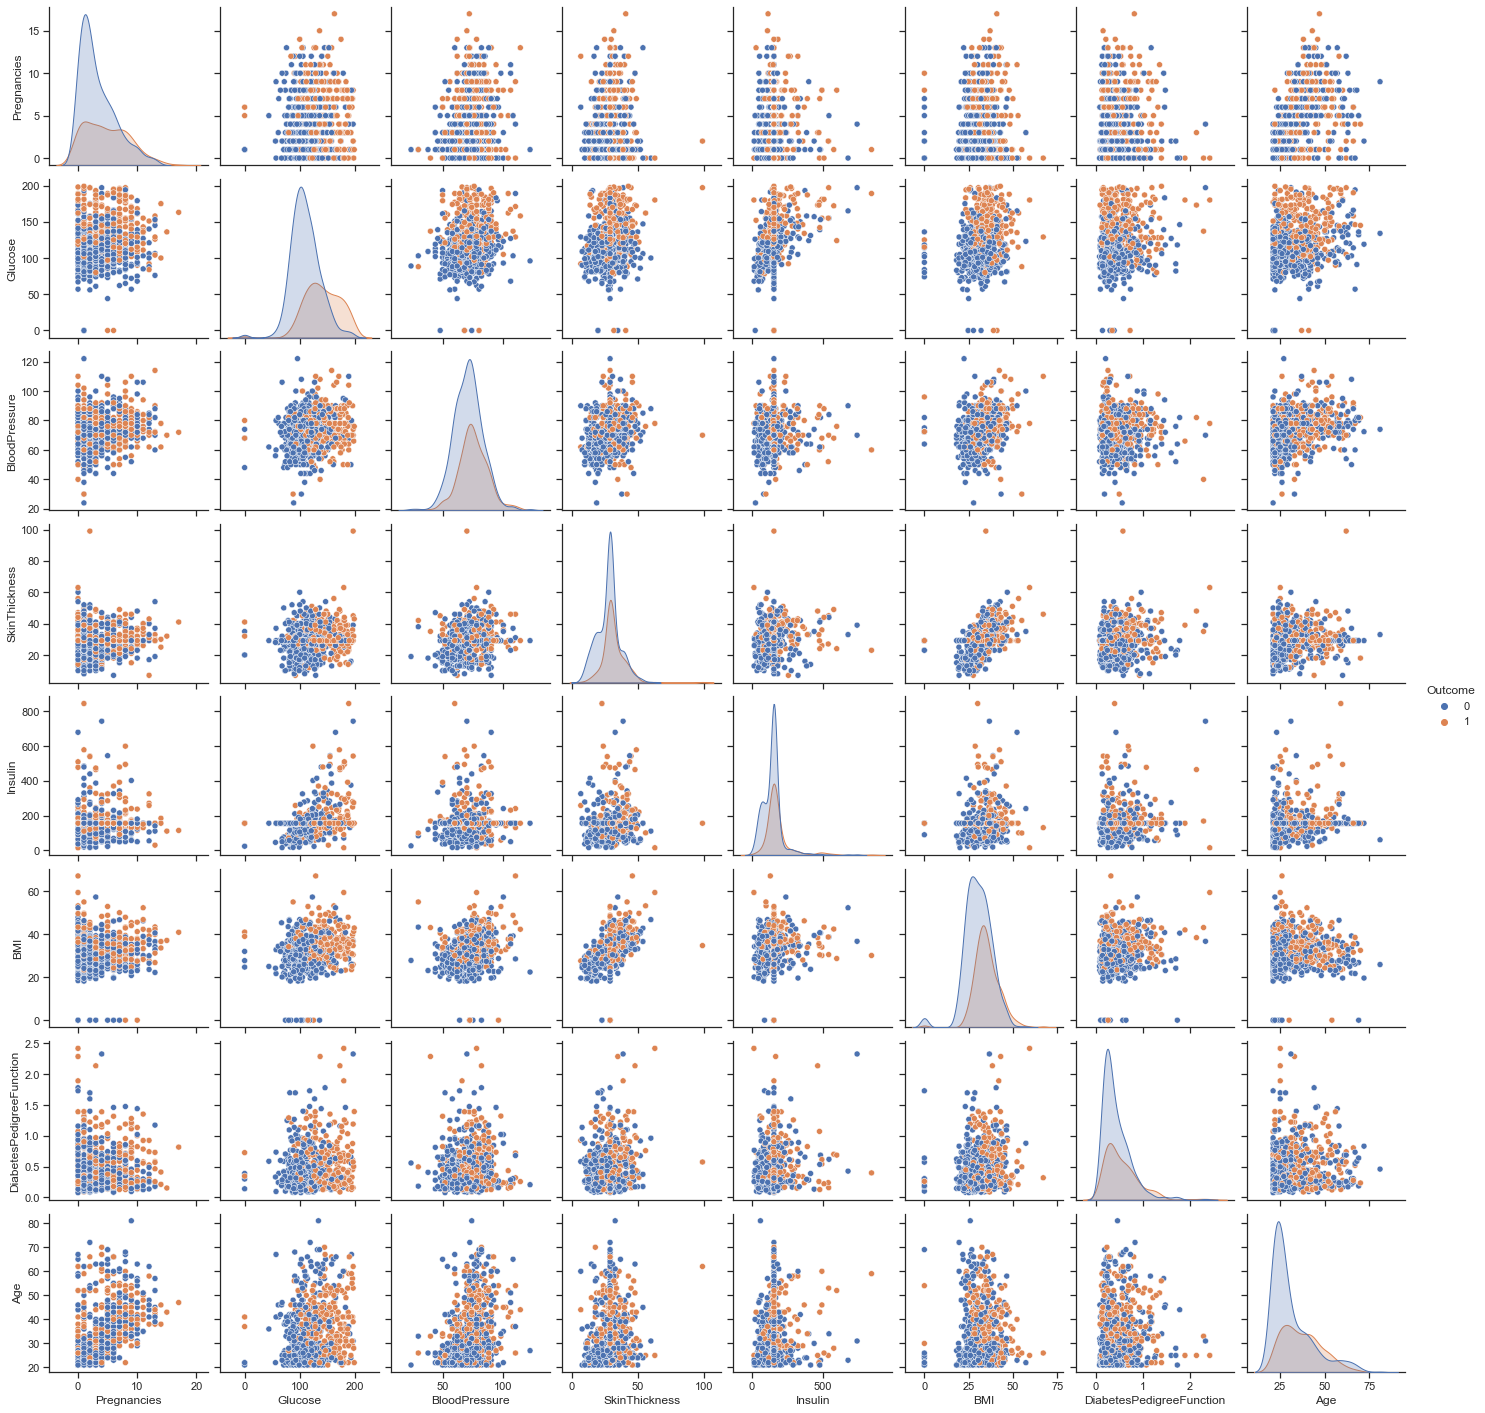

In [41]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dataset_imp,hue="Outcome")

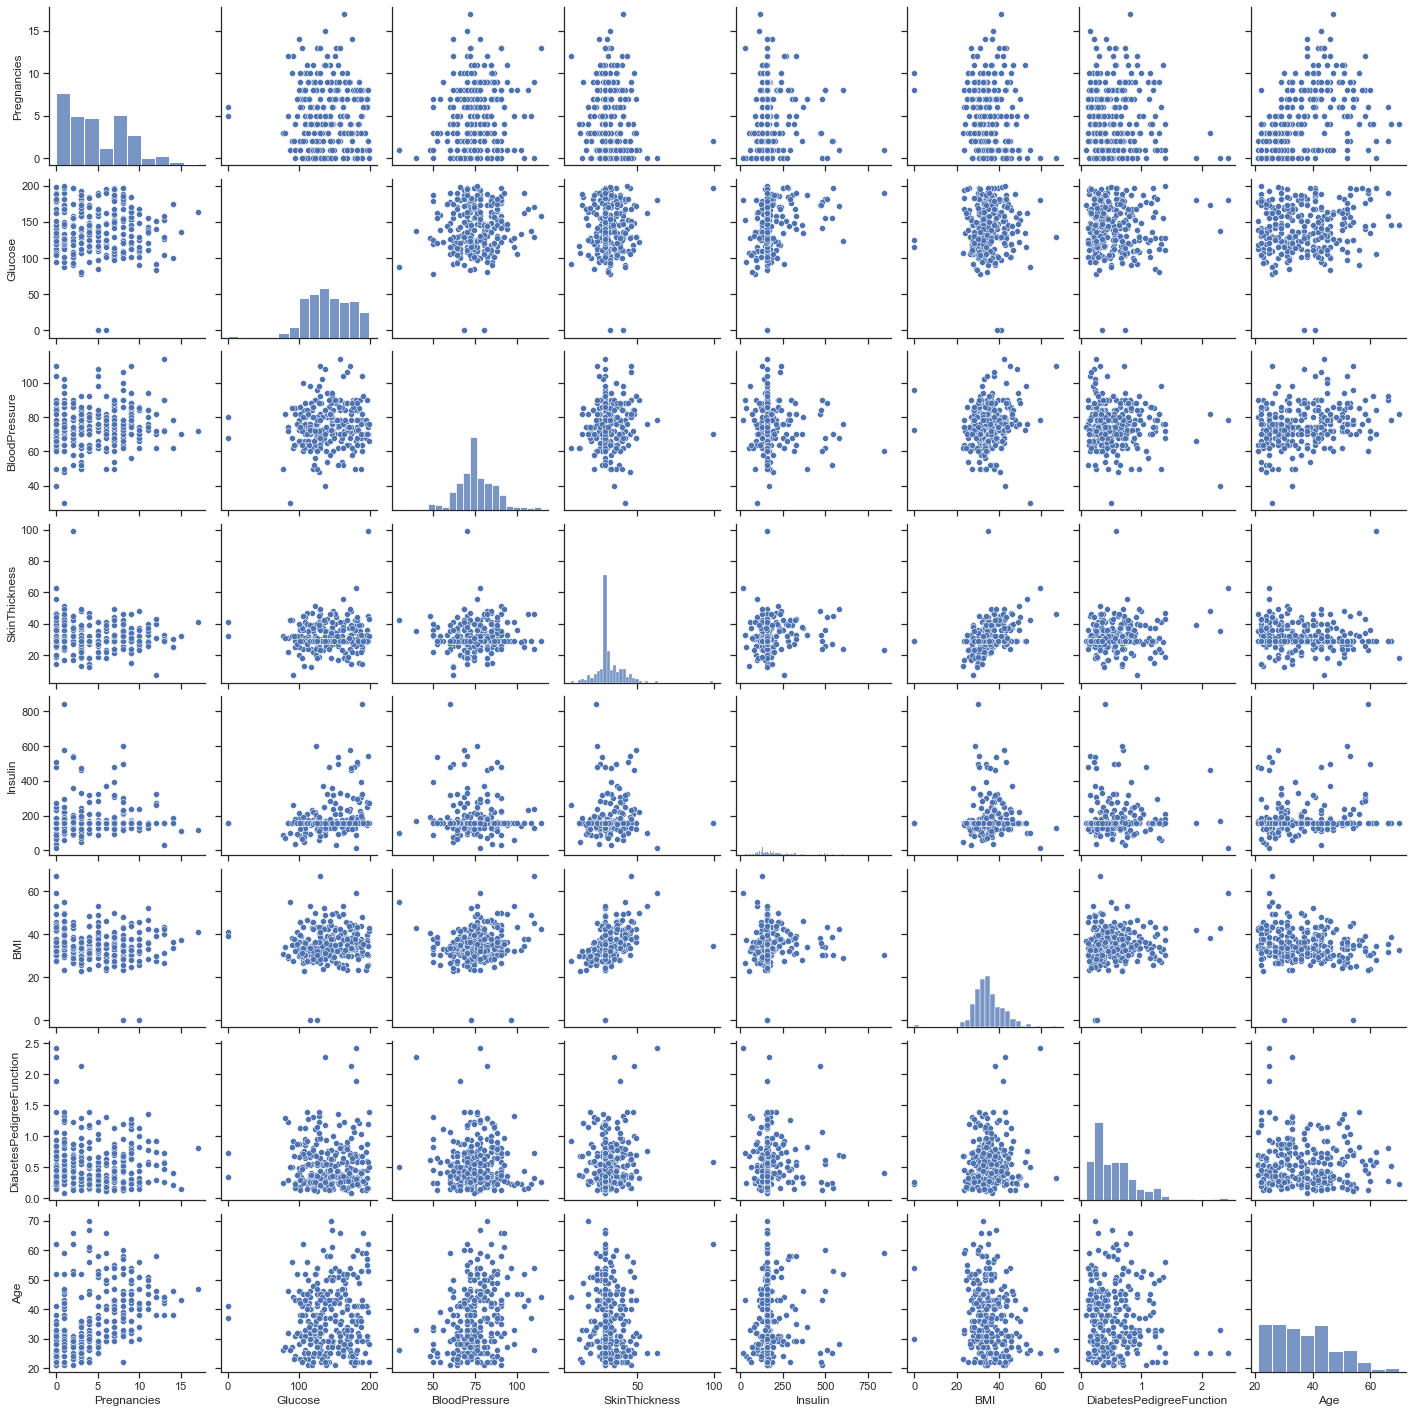

In [42]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Positive[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']])

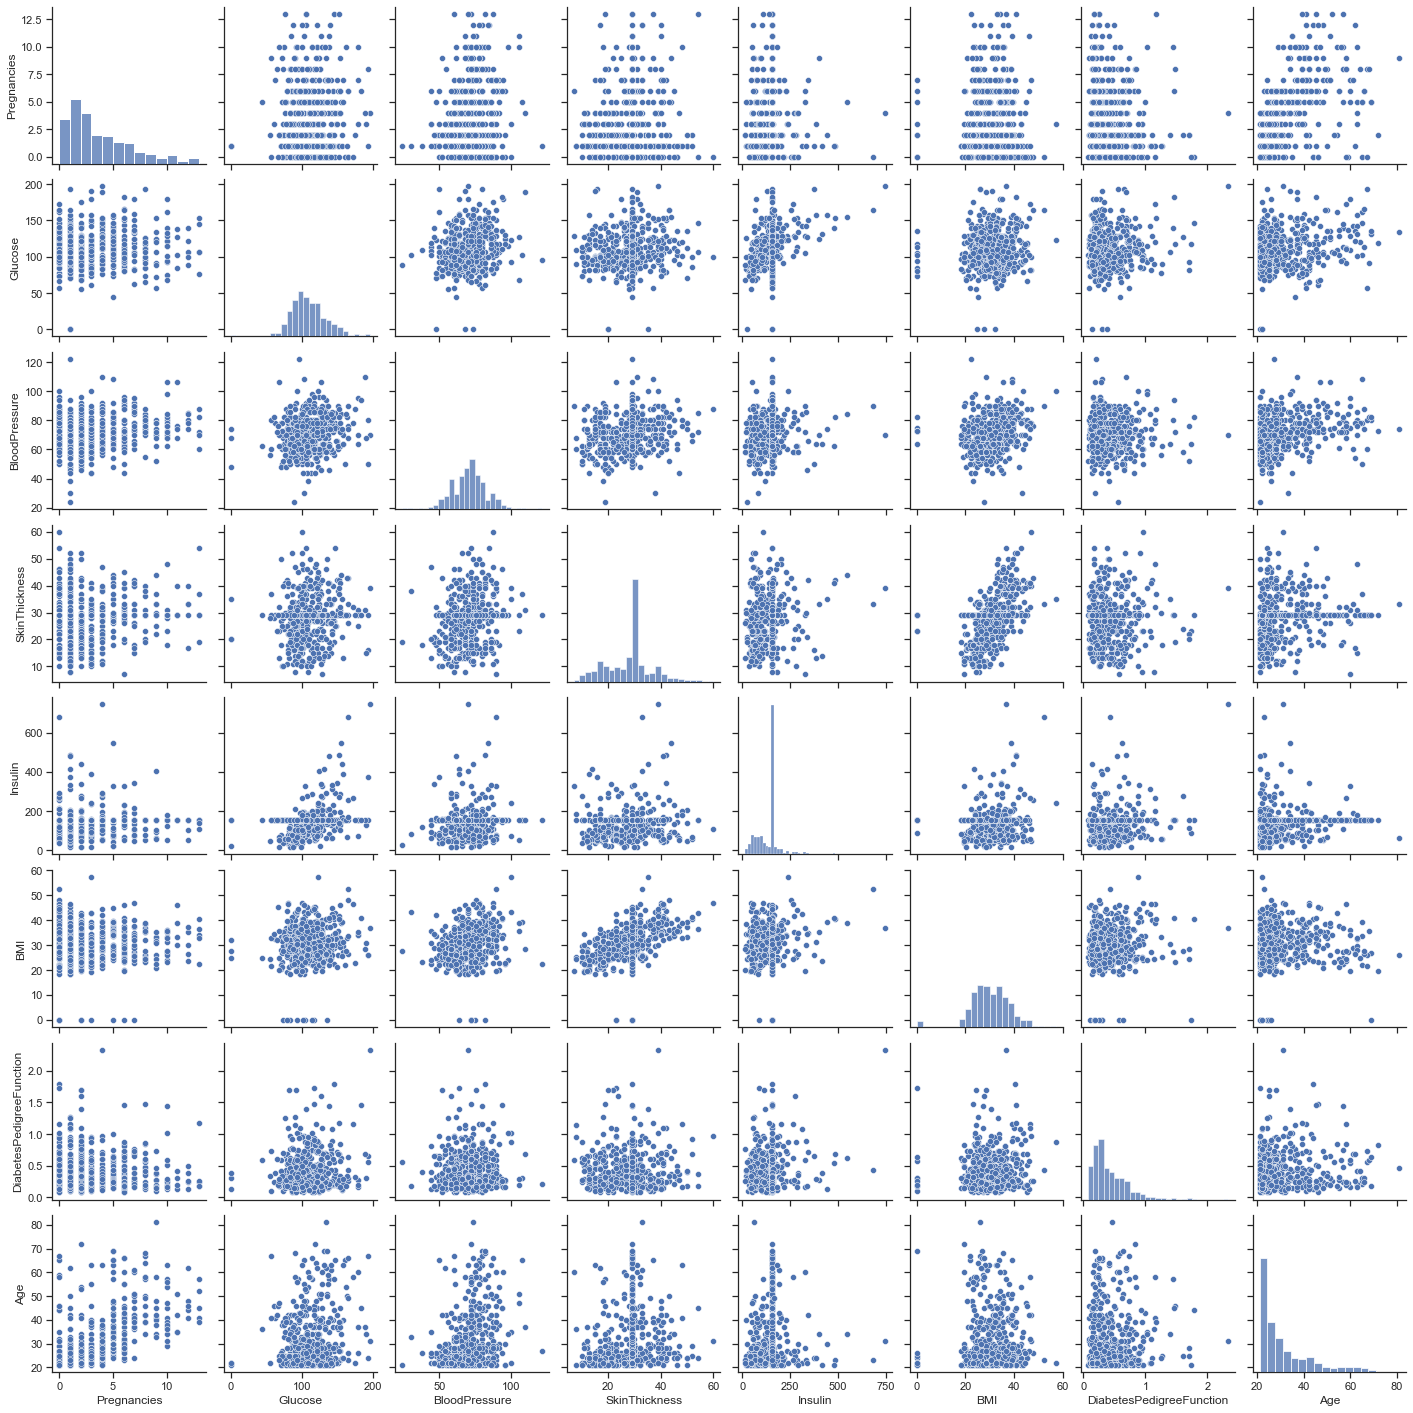

In [43]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Negative[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']])

In [44]:
dataset_imp.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.208522,0.082989,0.056027,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.217728,0.182455,0.407699,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.208522,0.217728,1.000000,0.192816,0.072517,0.233123,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.182455,0.192816,1.000000,0.158139,0.480496,0.100966,0.127872,0.215299
Insulin,0.056027,0.407699,0.072517,0.158139,1.000000,0.149468,0.098634,0.136734,0.214411
BMI,0.017683,0.221071,0.233123,0.480496,0.149468,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,-0.002763,0.100966,0.098634,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.324595,0.127872,0.136734,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.166074,0.215299,0.214411,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

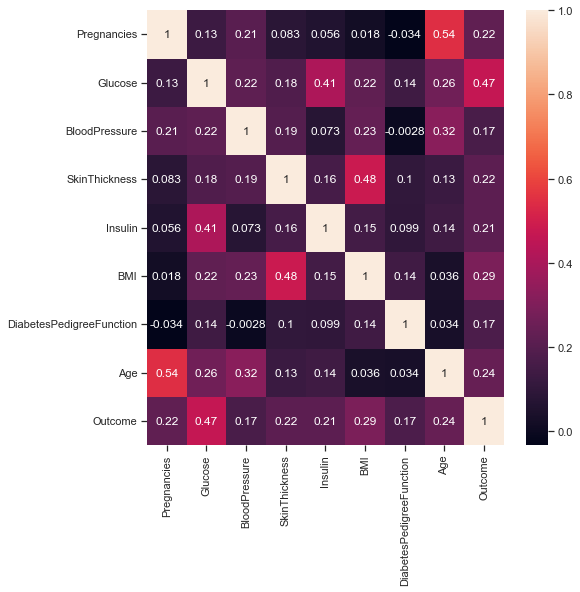

In [45]:
plt.subplots(figsize=(8,8))
sns.heatmap(dataset_imp.corr(),annot=True)

### Correlation Results :
1)There are not much multicolinearity
2)Pregnancies and Age have some positive corelation
3)Glucose has some postive corelation with the outcome variable
4)Skin thickness and BMI has some positive corelation
5)Insulin and Glucose has some positive corelation


# Project Task: Week 3 - Data Modelling

In [47]:
features = dataset_imp.iloc[:,[0,1,2,3,4,5,6,7]].values
label = dataset_imp.iloc[:,8].values

### Train test split

In [133]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state =0)

### Logistic Regression Model

In [100]:
#Create model
from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression()
logRegModel.fit(x_train,y_train)

C:\Users\Satyajeet Himanshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [178]:
y_pred = logRegModel.predict(x_test)

In [179]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [180]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

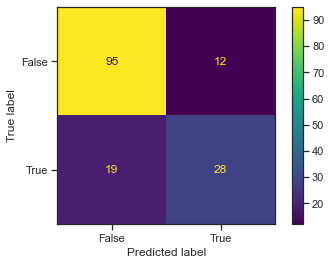

In [182]:
import matplotlib.pyplot as plt
from sklearn import metrics 
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False,True])
confusion_matrix.plot()
plt.show()

In [183]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7987012987012987

In [184]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       107
           1       0.70      0.60      0.64        47

    accuracy                           0.80       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.80      0.79       154



### Decision Tree Model

In [134]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [185]:
y_pred2 = dtree.predict(x_test)

In [186]:
y_pred2

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

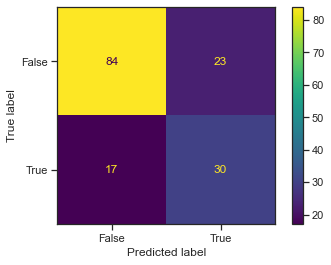

In [187]:
import matplotlib.pyplot as plt
from sklearn import metrics 
confusion_matrix = metrics.confusion_matrix(y_test,y_pred2)
confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False,True])
confusion_matrix.plot()
plt.show()

In [189]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.7402597402597403

In [190]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       107
           1       0.57      0.64      0.60        47

    accuracy                           0.74       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.75      0.74      0.74       154



### Random Forest Model

In [191]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=60)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=60)

In [192]:
y_pred3 = rfc.predict(x_test)

In [193]:
y_pred3

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

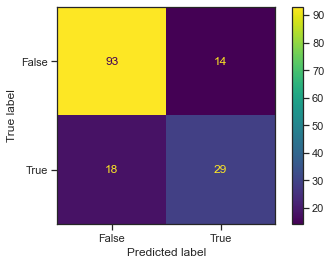

In [195]:
import matplotlib.pyplot as plt
from sklearn import metrics 
confusion_matrix = metrics.confusion_matrix(y_test,y_pred3)
confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False,True])
confusion_matrix.plot()
plt.show()

In [197]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred3)

0.7922077922077922

In [198]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       107
           1       0.57      0.64      0.60        47

    accuracy                           0.74       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.75      0.74      0.74       154



### KNN Model

In [170]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [173]:
y_pred4 = knn.predict(x_test)

In [174]:
y_pred4

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

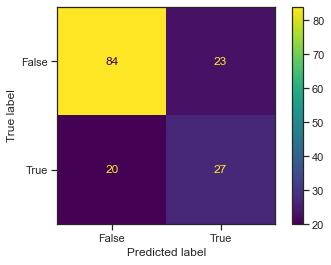

In [175]:
import matplotlib.pyplot as plt
from sklearn import metrics 
confusion_matrix = metrics.confusion_matrix(y_test,y_pred4)
confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False,True])
confusion_matrix.plot()
plt.show()

In [176]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred3)

0.8116883116883117

In [177]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       107
           1       0.57      0.64      0.60        47

    accuracy                           0.74       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.75      0.74      0.74       154



LR: 0.764642 (0.067946)
KNN: 0.708839 (0.089025)
CART: 0.695918 (0.090867)
RFC: 0.760931 (0.098413)
SVM: 0.758266 (0.075581)


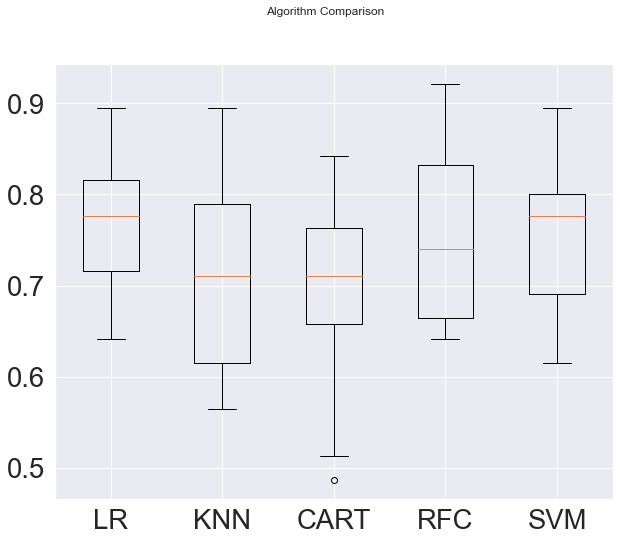

In [232]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# load dataset

array = dataset_imp.values
X = array[:,0:8]
Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=20, random_state=None)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Project Task: Week 4 - Data Modelling

### Logistic Regression

AUC: 0.742


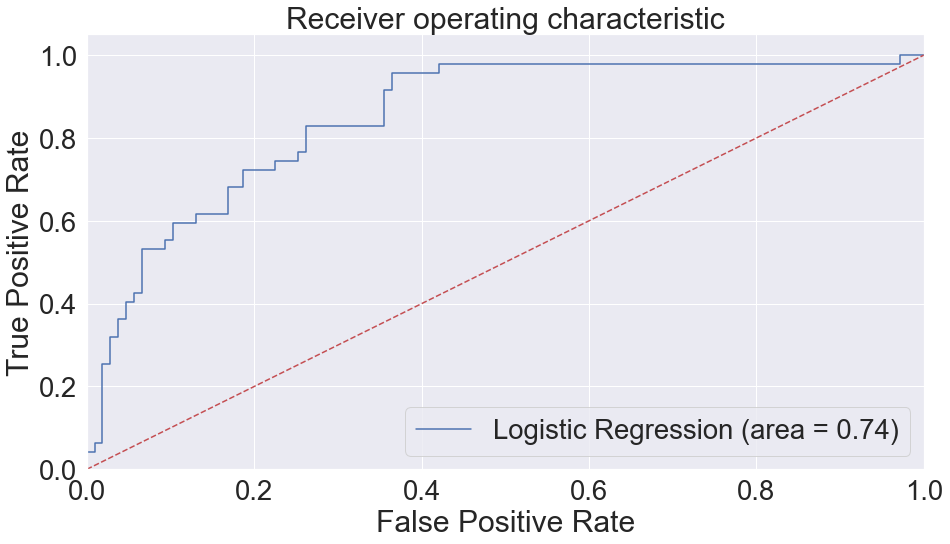

In [255]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logRegModel.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logRegModel.predict_proba(x_test)[:,1])
plt.figure(figsize=(15,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('AUC: %.3f' % logit_roc_auc)
plt.show()

### Decision Tree Model

AUC: 0.712


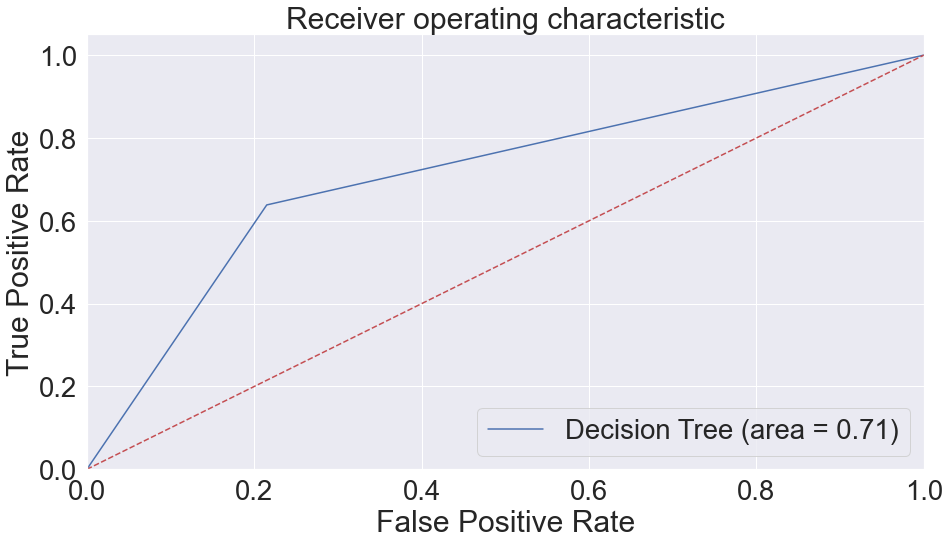

In [254]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(x_test)[:,1])
plt.figure(figsize=(15,8))
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
print('AUC: %.3f' % dt_roc_auc)
plt.show()

### Random Forest Model

AUC: 0.743


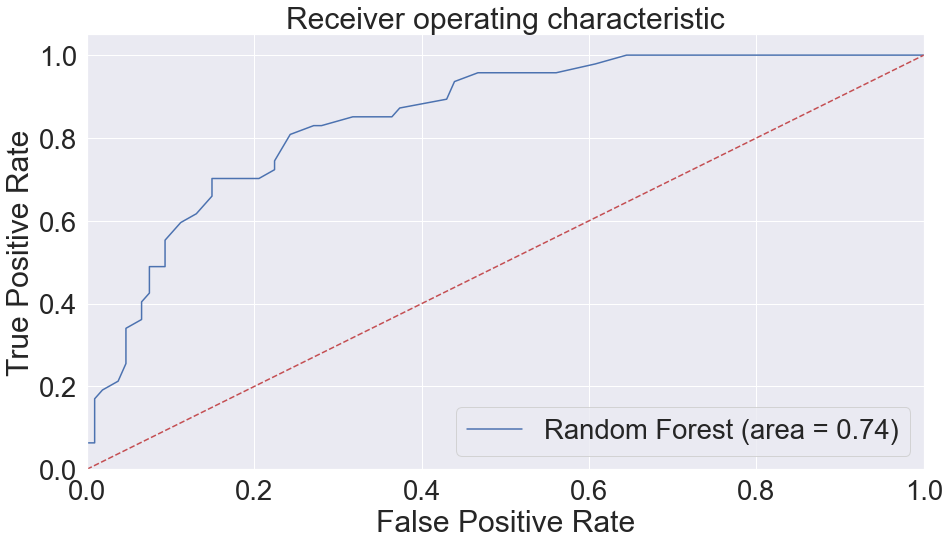

In [253]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rfc.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(x_test)[:,1])
plt.figure(figsize=(15,8))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
print('AUC: %.3f' % rf_roc_auc)
plt.show()

### KNN Model

AUC: 0.680


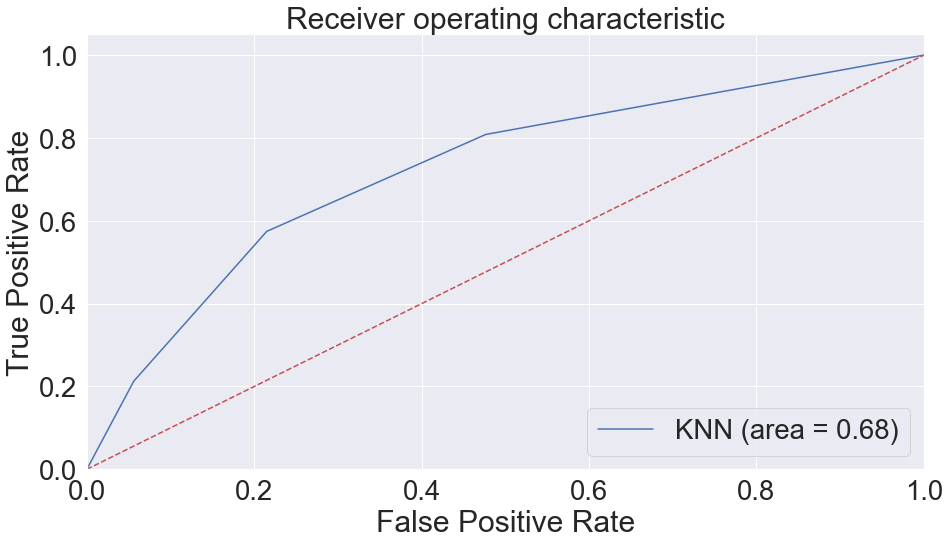

In [252]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, knn.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
plt.figure(figsize=(15,8))
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
print('AUC: %.3f' % rf_roc_auc)
plt.show()